<a href="https://colab.research.google.com/github/danny99999/NMDU_Projekt/blob/main/_Projekt_Danijel_Dupor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projekt**

**Kolegij**: Neuronske mreže i duboko učenje

**Tema**: Implementacija modela za klasifikaciju pasa po pasmini pomoću konvolucijskih neuronskih mreža

**Student**: Danijel Dupor

**JMBAG**: 0303085640

**Mentor**: doc.dr.sc.Goran Oreški/ mag.inf.Romeo Šajina

#**Dokumentacija**:


InceptionV3 link: https://medium.com/@maddalahima/building-an-image-classifier-model-using-pretrained-inceptionv3-566bee431352

Dataset link: https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set/data

Dataset autor: Gerry

##**Uvod**

Odlučio sam  uzeti ovu temu gdje ću usporediti više klasifikatora i trenirati modele na skupu slika različitih vrsta pasmina.

Ovu temu sam izabrao kako bi mogao bolje istražiti načine prepoznavanja pasmina koristeći duboke neuronske mreže. U svijetu postoji mnogo vrsta pasmina i ispravna klasifikacija nam može pomoći kod treninga, nadziranja napretka i evaluacije performansi modela, što može predstaviti izazov i priliku za napredak u ovom području. Razmišljao sam o uspoređivanju raznih tipova klasifikatora, ali sam na kraju odlučio da su konvolucijske neuronske mreže (CNN) idealne za ovakav zadatak.

Glavna svrha ovog zadatka je bila usporediti kako se različiti CNN modeli mogu ponašati u prepoznavanju i klasifikaciji raznih vrsta pasmina. U ovom zadatku ću izraditi nekoliko vlastitih modela koji će biti napravljeni specifično za ovu svrhu i usporediti ih s nekim postojećim modelima kako bi bolje ustanovio prednosti i ograničenja svake arhitekture.

U konačnici sam odlučio napraviti četiri vlastita modela za navedeni skup podataka, te sam od postojećih mreža koristio InceptionV3 mrežu u koju sam ubacio dodatne parametre kako bi prilagodio mrežu za svoj zadatak.

#**Priprema podataka**

Za ovaj zadatak sam koristio dataset koji sam skinuo sa Kaggle stranice koja je poznata po velikom sadržaju datasetova za strojno učenje. Dataset koji sam skinuo je imao 70 podfoldera sa slikama raznih pasmina i ukupno 9346 slika. Dataset je također već imao validacijske i testne slike. Dataset sam dodatno uredio tako što sam pasmine organizirao u 50 podfoldera u trening, test i validacija podfolderima.
Nakon uređenja dataseta omjer je bio sljedeći:
* Trening set: 85% slika iz svakog podfoldera, sveukupno 5645 slika
* Validacijski set: 7.5% slika iz svakog podfoldera, sveukupno 500 slika
* Testni set: 7.5% slika iz svakog podfoldera, sveukupno 500 slika

Ovim načinom podjele imam dataset koji je spreman za učenje, validaciju i testiranje CNN modela za prepoznavanje i klasificiranje pasmina.

#**Postavljanje Google Drive-a za učitavanje direktorija sa potrebnim slikama**

Da bi mogao učitavati slike za trening, validaciju i test direktorije, morao sam učitati cijeli dataset na Google Drive, koji će se dolje napisanim kodom importati u Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Ispisivanje sadržaja direktorija

U kodu ispod se prikazuju podatci za trening, test i validaciju.

In [ ]:
import tensorflow as tf
import os

train_dir= '/content/drive/MyDrive/dog_breed/trening' # Trening direktorij
validation_dir= '/content/drive/MyDrive/dog_breed/validacija' # Validacijski direktorij
test_dir= '/content/drive/MyDrive/dog_breed/test' # Testni direktorij

trening_names= os.listdir(train_dir)
valid_names=os.listdir(validation_dir)
test_names=os.listdir(test_dir)

print('Trening direktorij: ', trening_names)
print()
print('Validacijski direktorij: ', valid_names)
print()
print('Testni direktorij: ', test_names)

Trening direktorij:  ['Saint Bernard', 'Siberian Husky', 'Shiba Inu', 'Shar_Pei', 'Shih-Tzu', 'Yorkie', 'Rhodesian', 'Newfoundland', 'Malinois', 'Pekinese', 'Pit Bull', 'Mex Hairless', 'Pomeranian', 'Pug', 'Poodle', 'Irish Spaniel', 'Komondor', 'Greyhound', 'Labrador', 'Japanese Spaniel', 'Labradoodle', 'Dalmation', 'Golden Retriever', 'French Bulldog', 'Coyote', 'Dingo', 'German Sheperd', 'Doberman', 'Chinese Crested', 'Clumber', 'Chihuahua', 'Bulldog', 'Cockapoo', 'Cocker', 'Collie', 'Cairn', 'Bull Mastiff', 'Borzoi', 'Boston Terrier', 'Border Collie', 'Boxer', 'Bull Terrier', 'Afghan', 'American Spaniel', 'Basset', 'African Wild Dog', 'Basenji', 'Beagle', 'American Hairless', 'Airedale']

Validacijski direktorij:  ['Shar_Pei', 'Shiba Inu', 'Yorkie', 'Saint Bernard', 'Siberian Husky', 'Shih-Tzu', 'Pit Bull', 'Pekinese', 'Pug', 'Poodle', 'Malinois', 'Mex Hairless', 'Newfoundland', 'Rhodesian', 'Pomeranian', 'Labradoodle', 'Japanese Spaniel', 'Labrador', 'Irish Spaniel', 'Komondor', 'G

U sljedećem kodu se ispisuje što se nalazi u folderima za pasmine 'Bull Mastif' i 'Leonberg'kako bi provjerili jesu li sve slike tamo. Prikazuje se prvih 30 slika unutar svakog od tih dva foldera i može se vidjeti koliko ima slika u svakom direktoriju.

In [ ]:
trening_fnames= os.listdir(os.path.join(train_dir)) # Učitavanje sadržaja za treniranje

afghan_dir= '/content/drive/MyDrive/dog_breed/trening/Afghan'
afghan_fnames= os.listdir(afghan_dir)

boxer_dir= '/content/drive/MyDrive/dog_breed/trening/Boxer'
boxer_fnames= os.listdir(boxer_dir)
print()
print('Bull Mastif  direktorij: ', afghan_fnames[:30]) # prikaz prvih 30 slika u folderu
print()
print('Leonberg direktorij: ', boxer_fnames[:30]) # prikaz prvih 30 slika u folderu
print()
print('Broj trening slika za Yorkie klasu: ', len(os.listdir(afghan_dir)))
print()
print('Broj trening slika za Pug klasu: ', len(os.listdir(boxer_dir)))



Bull Mastif  direktorij:  ['053.jpg', '017.jpg', '012.jpg', '013.jpg', '026.jpg', '003.jpg', '007.jpg', '025.jpg', '043.jpg', '008.jpg', '027.jpg', '030.jpg', '006.jpg', '046.jpg', '038.jpg', '050.jpg', '029.jpg', '021.jpg', '009.jpg', '010.jpg', '037.jpg', '005.jpg', '052.jpg', '016.jpg', '031.jpg', '020.jpg', '049.jpg', '011.jpg', '041.jpg', '023.jpg']

Leonberg direktorij:  ['110.jpg', '083.jpg', '019.jpg', '112.jpg', '111.jpg', '076.jpg', '093.jpg', '116.jpg', '127.jpg', '029.jpg', '070.jpg', '054.jpg', '119.jpg', '061.jpg', '047.jpg', '078.jpg', '027.jpg', '104.jpg', '028.jpg', '113.jpg', '031.jpg', '046.jpg', '001.jpg', '050.jpg', '097.jpg', '084.jpg', '036.jpg', '068.jpg', '109.jpg', '108.jpg']

Broj trening slika za Yorkie klasu:  105

Broj trening slika za Pug klasu:  134


#**Prikaz dio slika iz treninga**

Da bi dobili bolji uvid u sadržaj direktorija za trening i test skup, trebamo izvući određeni broj slika iz dvije klase koje smo odabrali unutar trening skupa i prikazati ih u izvornom obliku. Ovo će nam pomoći da se malo bolje upoznamo s izgledom pasmina iz ovog skupa podataka.

Klase 'afghan' i 'boxer' u sebi sadrže po 8 prikazanih slika. Slike ilustriraju razne varijacije u izgledu svake pasmine kako bi vidjeli raznolikost pasmina unutar skupa podataka. Ovo će nam pomoći da bolje shvatimo podatke s kojima radimo prije nego što krenemo s treniranjem modela.

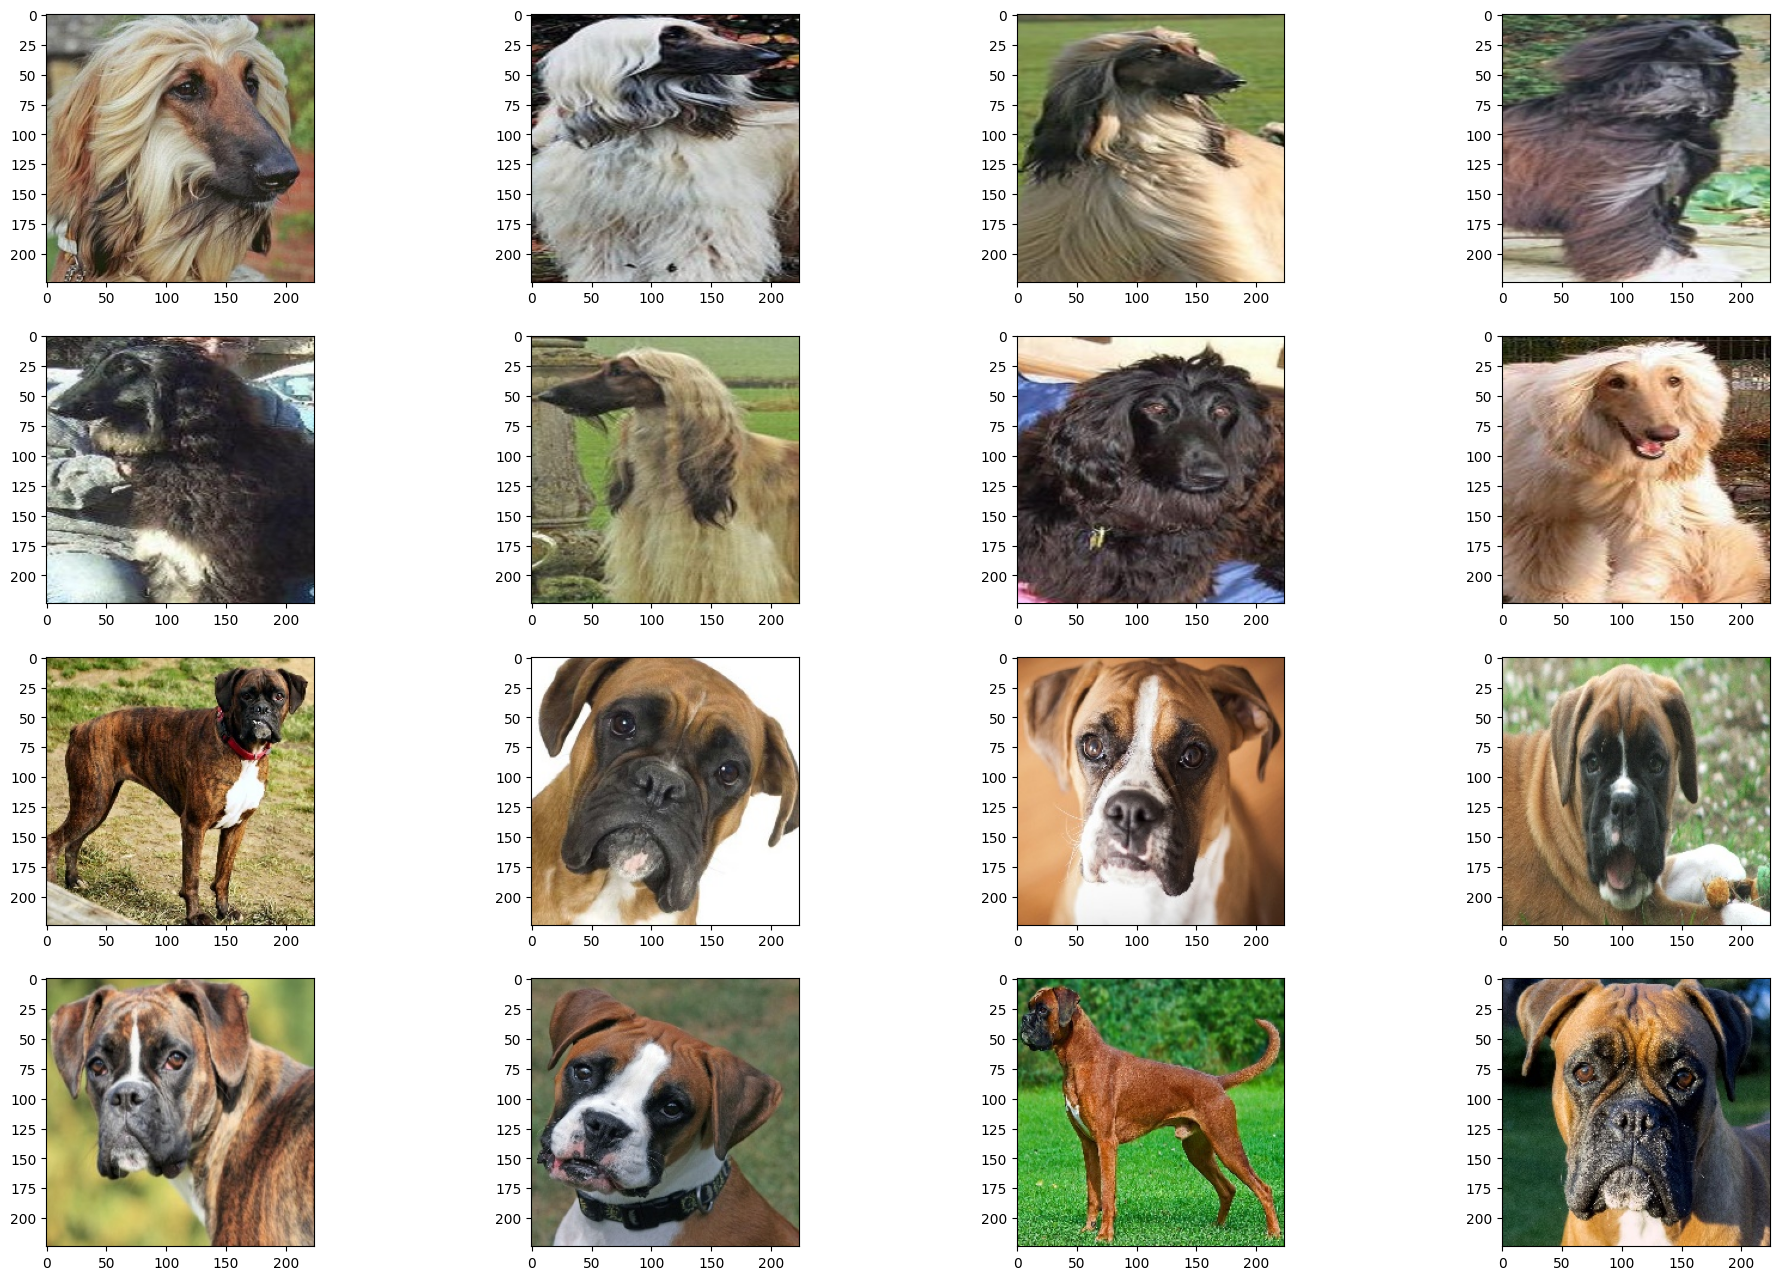

In [ ]:
%matplotlib inline
#Dohvat potrebnih biblioteka za prikaz slika/grafova
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Slike ćemo prikazati u 4x4 formatu
num_rows = 4
num_cols = 4

pic_index = 0 #iteriranje preko slika

fig = plt.gcf() #"plot - get current figure", ako nema slike nova kreirat će se nova
fig.set_size_inches(num_cols*4, num_rows*4)

pic_index+=8


afghan_pic= [os.path.join(afghan_dir, fname)
                  for fname in afghan_fnames[pic_index-8: pic_index]
               ]

boxer_pic= [os.path.join(boxer_dir, fname)
                  for fname in boxer_fnames[pic_index-8: pic_index]
               ]

for i, img_path in enumerate(afghan_pic + boxer_pic):
    #postavljamo subplot da bi se slike mogle istovremeno prikazati
    sp= plt.subplot(num_rows, num_cols, i+1)
    sp.axis('On') #kako se ne bi prikazivale osi ili obrubi
    img= mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

U sljedećem kodu imamo napravljen graf koji prikazuje broj raspodjeljenih slika u svakoj mapi za pasmine. Ovaj prikaz nam daje bolju vizualnu reprezentaciju raspodjela slika po mapama što nam olakšava čitanje podataka.

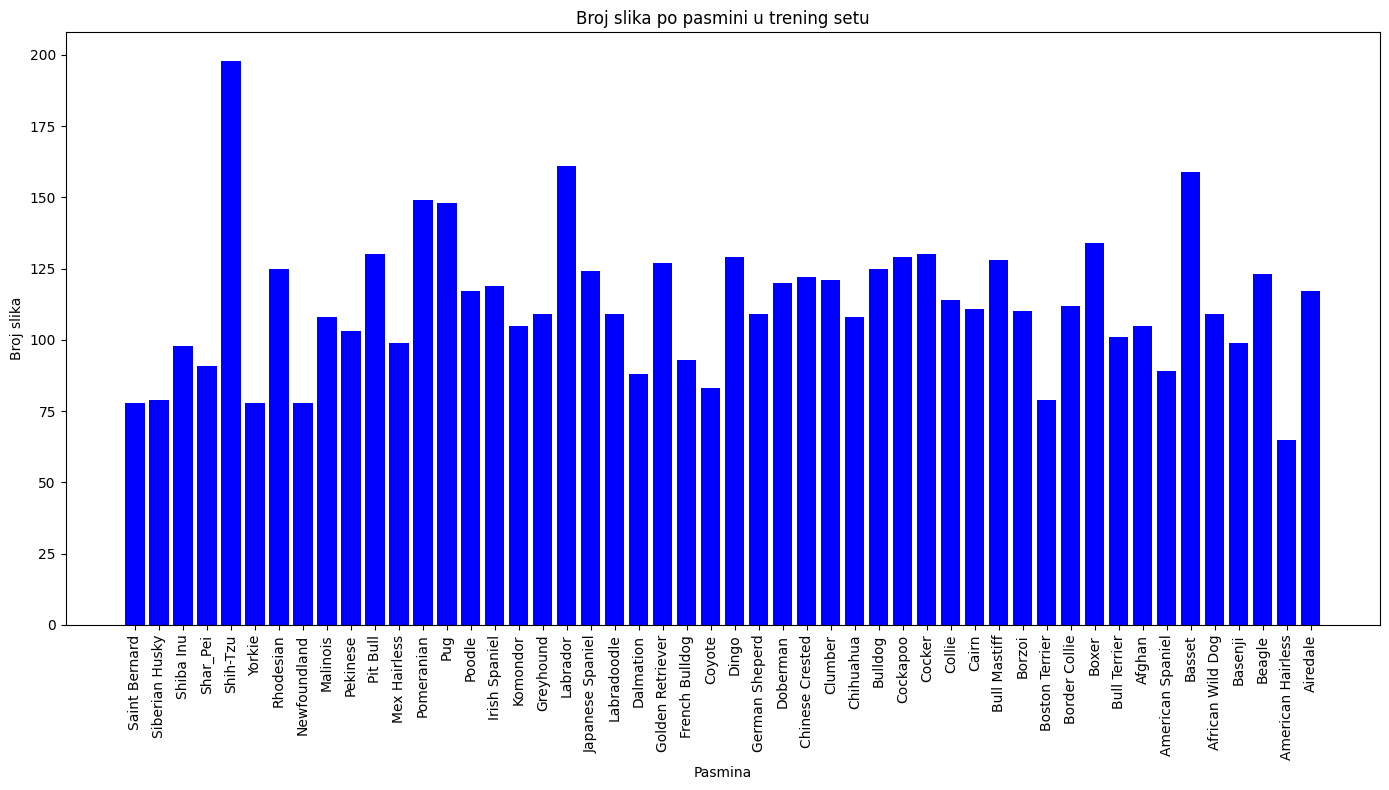

In [ ]:
import os
import matplotlib.pyplot as plt

# Postavljanje direktorija
train_dir = '/content/drive/MyDrive/dog_breed/trening'

# Funkcija za brojanje slika po pasminama u danom direktoriju
def count_images_per_breed(directory):
    breed_counts = {}
    for breed in os.listdir(directory):
        breed_dir = os.path.join(directory, breed)
        if os.path.isdir(breed_dir):
            breed_counts[breed] = len(os.listdir(breed_dir))
    return breed_counts

# Brojanje slika po pasminama unutar trening direktorija
train_counts = count_images_per_breed(train_dir)

# Imena pasmina i brojanje slika za graf
breeds = list(train_counts.keys())
train_values = list(train_counts.values())

# Crtanje grafa
fig, ax = plt.subplots(figsize=(14, 8))

# Barovi za trening set podataka
ax.bar(breeds, train_values, color='blue')

# Dodavanje naslova i oznaka
ax.set_xlabel('Pasmina')
ax.set_ylabel('Broj slika')
ax.set_title('Broj slika po pasmini u trening setu')
ax.set_xticks(range(len(breeds)))
ax.set_xticklabels(breeds, rotation=90)

plt.tight_layout()
plt.show()


##**Prvi model**

Sad kad smo postavili naš model, možemo započeti s treniranjem.

Prvo moramo pozvati generatore, definirati korake po svakoj epohi i broj epoha, te broj koraka za validaciju.

**Priprema podataka za prvi model**

Prije nego što krenemo s treniranjem moramo postaviti generatore za naše podatke. Oni će učitavati slike i puniti mrežu s njihovim vrijednostima. Treba napraviti generator za treniranje i validaciju. Generatori će u sebi imati 'batch_size' veličine 32 zbog učinkovitosti i brzine, veličine slika variraju po datasetu pa smo ih postavili na 150x150.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode ='categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))

Found 5645 images belonging to 50 classes.
Found 500 images belonging to 50 classes.


**Stvaranje prvog modela**

Kod ispod će stvoriti novi model neuronske mreže s konvolucijskim i potpuno povezanim slojevima što će omogućiti prepoznavanje i klasifikaciju pasmina. Prikazat će se arhitektura modela i uključeni slojevi modela.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])

optimizer = RMSprop(learning_rate=1e-3)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │          25,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,519,698 (36.31 MB)

 Trainable params: 9,519,698 (36.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=20,
                    validation_steps=20,
                    validation_data=validation_generator,
                    )

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.0176 - loss: 4.1201 - val_accuracy: 0.0380 - val_loss: 3.9401
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0569 - loss: 3.8366 - val_accuracy: 0.0360 - val_loss: 3.7942
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1080 - loss: 3.5438 - val_accuracy: 0.1080 - val_loss: 3.5990
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 941ms/step - accuracy: 0.1661 - loss: 3.2604 - val_accuracy: 0.1160 - val_loss: 3.5538
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2261 - loss: 2.9500 - val_accuracy: 0.1680 - val_loss: 3.2604
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.2763 - loss: 2.7472 - val_accuracy: 0.2160 - val_loss: 3.0611
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3350 - loss: 2.5239 - val_accuracy: 0.2300 - val_loss: 2.9615
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 44s 975ms/step - accuracy: 0.4492 - loss: 2.1048 - val_accuracy: 0.2480 - val

##**Tumačenje rezultata prvog modela**

Rezultati koje smo dobili s treninga nam prikazuju da je točnost modela niska u ranim epohama te imamo visoki gubitak na validacijskim podatcima. Od četvrte epohe pa na dalje vidimo da se točnost na trening i validacijskim podatcima poboljšava gdje točnost na trening podacima raste s 1% do 62% te na trening podacima raste s 3% na 30% do jedanaeste epohe. Također uočavamo da točnost na trening podacima raste brže nego na validacijskim podacima i gubitak na trening podacima se brže smanjuje nego na validacijskim podacima. To znači da se model suočava s overfitanjem jer model postaje prenaučen i predobar na trening podacima u odnosu na validacijske podatke.

##**Graf točnosti za prvi model**

Sljedeći graf prikazuje da dolazi do promjene na trening i validacijskom skupu kroz epohe.

Na obje krivulje vidimo rast točnosti u prvih pet epoha, što znači da model uči iz podataka. Međutim od pete epohe pa nadalje vidimo da model počinje overfitati jer točnost na trening podatcima raste mnogo brže od validacijskih podataka s time da nakon određenog vremena točnost validacije stagnira.

Ovaj graf ilustrira da nakon određenog broja epoha se suočavamo s overfitanjem te je potrebno poboljšati model da bi se rješili pretreniranosti modela.

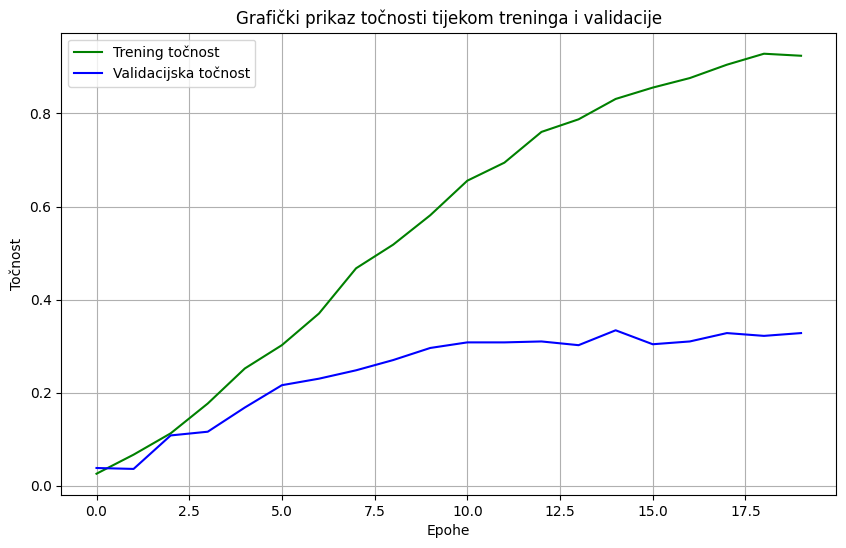

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje točnosti iz povijesti treniranja
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Dobivanje broja epoha
epochs = range(len(acc))

# Prikazivanje grafa točnosti
plt.figure(figsize=(10, 6))  # Veličina grafa
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Grafički prikaz točnosti tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Graf gubitka za prvi model**

Na grafu gubitka vidimo isti trend kao na grafu točnosti. U prvih par epoha gubitak na trening i validacijskom skupu opada što znači da počinje poboljšavati sposobnost predviđanja, ali u ostalim epohama gubitak na trening skupu i dalje brzo opada dok gubitak na validacijskim podacima stagnira i nakon nekog vremena se počinje povećavati.

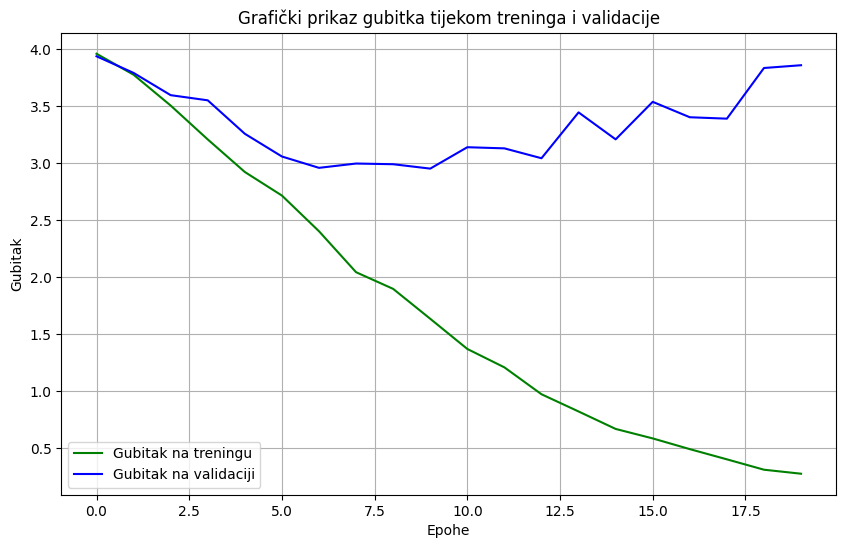

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje gubitka iz povijesti treniranja
loss = history.history['loss']
val_loss = history.history['val_loss']

# Dobivanje broja epoha
epochs = range(len(loss))

# Prikazivanje grafa gubitka
plt.figure(figsize=(10, 6)) # Veličina grafa
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Grafički prikaz gubitka tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Drugi model**

Nakon prvog modela gdje smo uočili problem s overfitanjem, potrebno ga je poboljšati s izmjenama tako da pokušamo smanjiti overfiting.

**Postavljanje i stvaranje drugog modela**

Promjene:
* Model ima veću dubinu u smislu broja filtera (32-64-128-256) umjesto (16-32-64)
* Stavljen je Adam optimizer umjesto RMSprop
* Broj neurona u skrivenom sloju je povećan sa 512 na 515
* Dodan dropout sloj za regularizaciju poslje prvog potpuno povezanog sloja, što će nam pomoći smanjiti pretreniranost modela

**Priprema podataka**

Nakon što smo postavili prvi model, sad možemo krenuti s novim modelom.

Promjena:
* Btach size je promijenjen sa 32 na 64

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.,)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.,)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode ='categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 64,
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size = 64,
                                                        class_mode = 'categorical',
                                                        target_size = (150,150))

Found 5645 images belonging to 50 classes.
Found 500 images belonging to 50 classes.
Found 500 images belonging to 50 classes.


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    tf.keras.layers.Dense(515, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='softmax')
])

optimizer = Adam(learning_rate=1e-3)
loss_func = 'categorical_crossentropy'

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 515)                 │       6,460,675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 515)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │          25,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,874,891 (26.23 MB)

 Trainable params: 6,874,891 (26.23 MB)

 Non-trainable params: 0 (0.00 B)

Promjene:
* Broj koraka po epohi je povećan na 60

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=60,
                    epochs=20,
                    validation_steps=20,
                    validation_data=validation_generator,
                    )

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.0181 - loss: 3.9144 - val_accuracy: 0.0240 - val_loss: 3.8901
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.0436 - loss: 3.8341 - val_accuracy: 0.0520 - val_loss: 3.7137
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 299s 4s/step - accuracy: 0.0671 - loss: 3.6686 - val_accuracy: 0.1080 - val_loss: 3.4837
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.1149 - loss: 3.4101 - val_accuracy: 0.1620 - val_loss: 3.2661
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.1453 - loss: 3.2560 - val_accuracy: 0.2420 - val_loss: 3.0906
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.1944 - loss: 3.1210 - val_accuracy: 0.2380 - val_loss: 3.0172
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.2148 - loss: 2.9527 - val_accuracy: 0.2220 - val_loss: 2.9909
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.2464 - loss: 2.8492 - val_accuracy: 0.2700 - v

##**Tumačenje rezultata drugog modela**

U ovom modelu koristeći tehniku dodavanja dropout sloja za regularizaciju i produbljivanjem modela kako bi smanjili overfiting, vidimo da nakon određenog broja epoha i dalje dolazi do pretreniranosti ali do manje mjere u odnosu na prvi model. To nam govori da trebamo primjeniti dodatne tehnike poput augmentacije podataka, dodavanje L2 regularizacije kako bi još više smanjili razinu pretreniranosti modela.

 S ovim modelom smo dobili bolju točnost i manji gubitak na validaciji ali definitivno postoji još mjesta za poboljšanje

##**Graf točnosti za drugi model**

Trening i validacijska točnost započinju ispod 1% te se skupa postepeno povećavaju do desete epohe što je poboljšanje u odnosu na prvi model koji je već nakon pete epohe imao problem s pretreniranjem. Nakon desete epohe točnost na trening skupu raste brže nego na validacijskom skupu ali do manje mjere u odnosu na prvi model.

Ovaj graf prikazuje da ovaj model bolje uči od prvog s tim što smo postigli veću točnost i manji gubitak na validacijskim podacima s manjom razinom pretreniranosti.

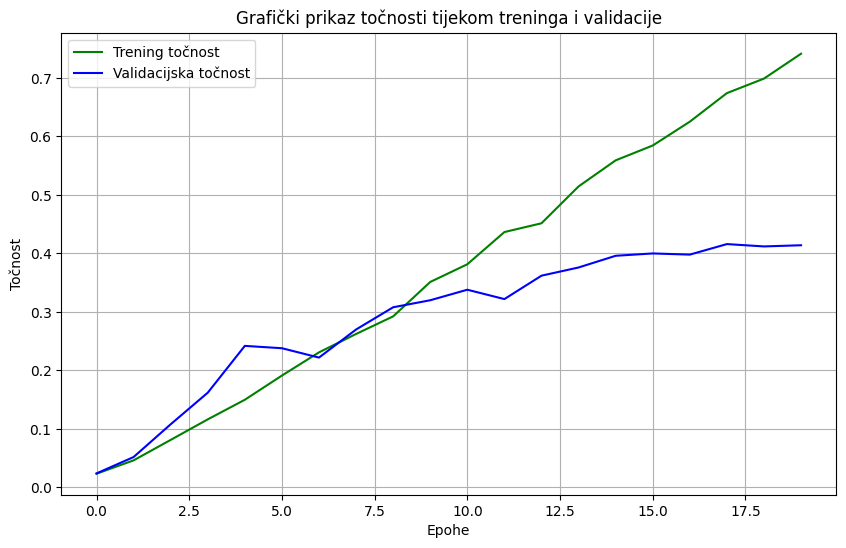

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje točnosti iz povijesti treniranja
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Dobivanje broja epoha
epochs = range(len(acc))

# Prikazivanje grafa točnosti
plt.figure(figsize=(10, 6))  # Veličina grafa
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Grafički prikaz točnosti tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Graf gubitka za drugi model**
U drugom modelu imamo manji gubitak u odnosu na prvi model, vidimo da se gubitak na validaciji i treningu više smanjuje kao i na grafu točnosti, vidimo da smo smanjili razinu pretreniranosti i model bolje uči nego prvi model.


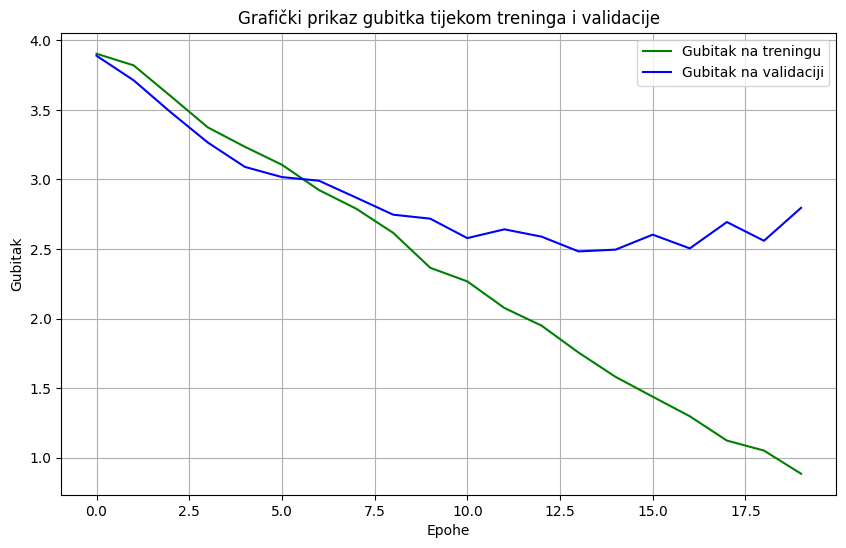

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje gubitka iz povijesti treniranja
loss = history.history['loss']
val_loss = history.history['val_loss']

# Dobivanje broja epoha
epochs = range(len(loss))

# Prikazivanje grafa gubitka
plt.figure(figsize=(10, 6)) # Veličina grafa
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Grafički prikaz gubitka tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Treći model**

Nakon poboljšanog drugog modela, nastavljamo na treći model gdje ćemo pokušati koristiti ostale tehnike za smanjivanje pretreniranosti.

Kako model nebi pre brzo trenirao na trening podacima smanjili smo Batch veličinu nazad na 32, također smo smanjili broj neurona u skrivenom sloju na 512 i dodali smo L2 regularizaciju na dense sloj kako bi dodatno smanjili pretreniranost. L2 regularizacija također čini model manje osjetljivim na malim varijacijama u trening podatcima. S ovim promjenama očekujem dodatno poboljšanje što se tiče pretreniranosti modela.

Također smo maknuli korake po epohi i postavili smo validacijske korake na 'None' kako bi Keras automatski odredio idealan broj koraka potreban za naše podatke u generatoru.

Priprema podataka za treći model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.,)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.,)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode ='categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150,150))

Found 5645 images belonging to 50 classes.
Found 500 images belonging to 50 classes.
Found 500 images belonging to 50 classes.


Stvaranje trećeg modela

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    tf.keras.layers.Dense(512, activation='relu',  kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(50, activation='softmax')
])

optimizer = Adam(learning_rate=1e-3)
loss_func = 'categorical_crossentropy'

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │          25,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,837,106 (26.08 MB)

 Trainable params: 6,837,106 (26.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_steps= None,
                    validation_data=validation_generator,
                    )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


177/177 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.0269 - loss: 5.6279 - val_accuracy: 0.0300 - val_loss: 3.8968
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.0549 - loss: 3.8392 - val_accuracy: 0.0560 - val_loss: 3.7299
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.0594 - loss: 3.7439 - val_accuracy: 0.0940 - val_loss: 3.6426
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.0973 - loss: 3.5792 - val_accuracy: 0.1180 - val_loss: 3.4974
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.1211 - loss: 3.5230 - val_accuracy: 0.1580 - val_loss: 3.3659
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.1336 - loss: 3.4034 - val_accuracy: 0.1980 - val_loss: 3.3584
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.1576 - loss: 3.3226 - val_accuracy: 0.2300 - val_loss: 3.2116
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.1832 - loss: 3.1753 - val_accuracy: 0.232



##**Tumačenje rezultata trećeg modela**

Na ovom modelu dobivamo manju točnost i veći gubitak na trening podacima u odnosu na drugi model. Validacijska točnost ostaje ista dok je gubitak malo lošiji nego na prethodnom modelu, međutim vidimo da smo uspjeli eliminirati pretreniranost u modelu u odnosu na prethodne iteracije. Model i dalje uči iz podataka ali sporo uči što sugerira da mu treba još epoha da ima više vremena za učenje te je potrebno učiniti model kompleksnijim s više slojeva.
To će pomoći modelu da se bolje snalazi na kompleksnim elementima slika.

##**Graf točnosti za treći model**

Graf  gubitka pokazuje da više nemamo problem pretreniranosti modela. Vidimo da se točnost na trening i validacijskim podacima povećavaju skupa.

Manja točnost na trening podacima u odnosu na prethodni model nam sugerira da i dalje možemo poboljšati model s tehnikama poput dodavanja kompleksnosti mreže, smanjivanje razine učenja kroz epohe i dodavanje augmentacije podataka.

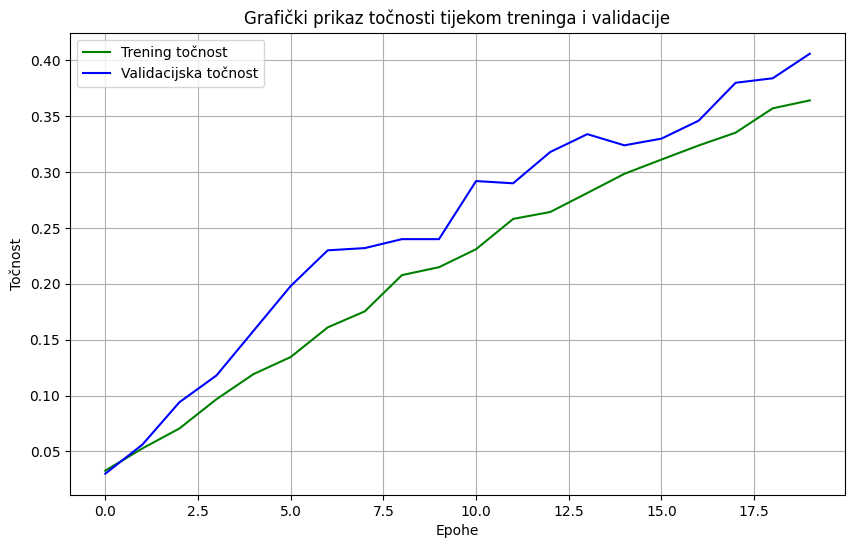

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje točnosti iz povijesti treniranja
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Dobivanje broja epoha
epochs = range(len(acc))

# Prikazivanje grafa točnosti
plt.figure(figsize=(10, 6))  # Veličina grafa
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Grafički prikaz točnosti tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Graf gubitka za treći model.**

Isto kao na grafu točnosti vidimo da više nemamo problem s overfitanjem. Gubitak na trening podatcima je veći u odnosu na prethodni model dok je gubitak na validacijskim podatcima isti kao i u prethodnom modelu.

Vidimo da ovaj model uspijeva učiti iz podataka po tome što se točnost postepeno povećava i gubitak postepeno smanjuje, ali vidimo da model sporo uči što sugerira da se može još poboljšati s nekim od tehnika koje smo već prije spomenuli.

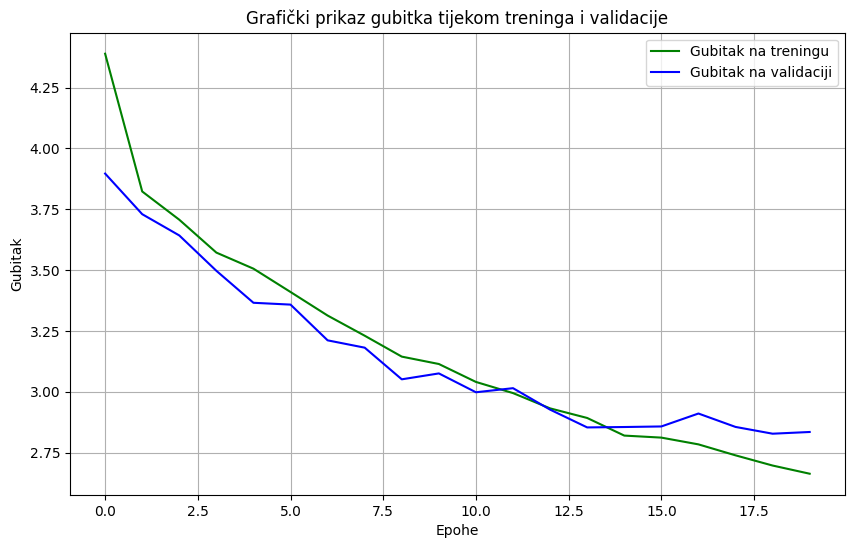

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje gubitka iz povijesti treniranja
loss = history.history['loss']
val_loss = history.history['val_loss']

# Dobivanje broja epoha
epochs = range(len(loss))

# Prikazivanje grafa gubitka
plt.figure(figsize=(10, 6)) # Veličina grafa
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Grafički prikaz gubitka tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Četvri model**

Za četvrti model sam odlučio dodati augmentaciju podataka. Augmentacija će povećati raznolikost podataka u treningu što će na kraju pomoći da model bolje generalizira na podacima koje još nije vidio.

Augmentacija dodaje varijacije slikama tako što ih rotira, pomiče i okreće, što će učiniti model otpornijim na takve transformacije.

U model sam odlučio staviti veći broj slojeva i povećati broj filtera za svaki konvolucijski sloj kako bi model mogao lakše izvući kompleksnije značajke sa slika.

Dodao sam 'Batch Normalization' u model što će pomoći sa stabilizacijom i ubrzanjem treninga, normalizira aktivacije i smanjuje interne kovarijantne pomake što može poboljšati generalizaciju.

Umjesto ReLU koristio sam LeakyReLU aktivaciju, to može ublažiti problem umirujućih ReLU-ova i može poboljšati učenje za složenije modele.

Dropout sam smanjio sa 0.5 na 0.4, dodao sam 'GlobalAveragePooling' umjesto 'Flatten' jer može smanjiti broj parametara i biti efektivniji kod smanjivanja pretreniranja.

I za kraj sam dodao Learning Rate Scheduler kako bi model mogao automatski smanjiti stopu učenja tijekom treninga kada model krene stagnirati.

Priprema podataka za četvrti model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
                               )
validation_datagen = ImageDataGenerator(rescale = 1.0/255.,)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode ='categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150,150))

Found 5645 images belonging to 50 classes.
Found 500 images belonging to 50 classes.
Found 500 images belonging to 50 classes.


Stvaranje četvrtog modela

In [ ]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([

    Conv2D(32, (3, 3), activation=None, input_shape=(150, 150, 3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(2, 2),


    Conv2D(64, (3, 3), activation=None),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(2, 2),


    Conv2D(128, (3, 3), activation=None),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation=None),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(2, 2),


    Conv2D(512, (3, 3), activation=None),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(2, 2),


    GlobalAveragePooling2D(),

    Dense(512, activation='relu'),
    Dense(50, activation='softmax')
])


optimizer = Adam(learning_rate=1e-4)
loss_func = 'categorical_crossentropy'

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 patience=3,
                                 factor=0.5,
                                 verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 5, 5, 512)           │              

 Total params: 1,860,850 (7.10 MB)

 Trainable params: 1,858,866 (7.09 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:

history = model.fit(train_generator,
                    epochs=40,
                    validation_steps= None,
                    validation_data=validation_generator,
                    callbacks=[lr_scheduler])

Epoch 1/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.0779 - loss: 3.7345 - val_accuracy: 0.0200 - val_loss: 4.2964 - learning_rate: 1.0000e-04
Epoch 2/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.1474 - loss: 3.2465 - val_accuracy: 0.0200 - val_loss: 4.1976 - learning_rate: 1.0000e-04
Epoch 3/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.1981 - loss: 3.0420 - val_accuracy: 0.1700 - val_loss: 3.2023 - learning_rate: 1.0000e-04
Epoch 4/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.2343 - loss: 2.8879 - val_accuracy: 0.2340 - val_loss: 2.8791 - learning_rate: 1.0000e-04
Epoch 5/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.2533 - loss: 2.8088 - val_accuracy: 0.2840 - val_loss: 2.7362 - learning_rate: 1.0000e-04
Epoch 6/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.2906 - loss: 2.6787 - val_accuracy: 0.2980 - val_loss: 2.6456 - learning_rate: 1.0000e-04
Epoch 7/40
177/177 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - acc

##**Tumačenje rezultata četvrtog modela**

S ovim modelom dobivamo najbolje rezultate do sad, točnost treninga je skočila sa 38% na 56% u odnosu na prethodni model, točnost validacije je skočila sa 40% na 65%, te je gubitak na validacijskim i trening podatcima znatno bolji od prethodnog modela.

Za ovaj model sam stavio da se trenira kroz više epoha kako bi imao više prilika za učenje iz podataka, i također možemo vidjeti da model automatski smanjuje stopu učenja kad učenje krene stagnirati i rezultati nakon smanjenja učenja se nastavljaju poboljšavati.

I vidimo da augmentacija podataka, GlobalaveragePooling i Dropout dalje rade svoj posao jer nemamo problem pretreniranosti.

##**Graf točnosti za četvrti model**

Na ovom grafu vidimo kako trening i validacija počinju s niskom točnošću oko 1% i manje i kroz povećani broj epoha se povećava sve dok točnost na treningu ne dosegne 56%  i 64% na validaciji, te vidimo da nema ovefitanja. Imamo povremene oscilacije na validacijiskoj točnosti što sugerira na varijabilnost u modelu, ali generalni trend je pozitivan.

Iako model nema savršenu točnost, poboljšanja su i dalje uočljiva i imamo do sad najbolje balansirani model u smislu da nema pretreniranosti i imamo najbolju točnost na validacijskim podatcima do sad.

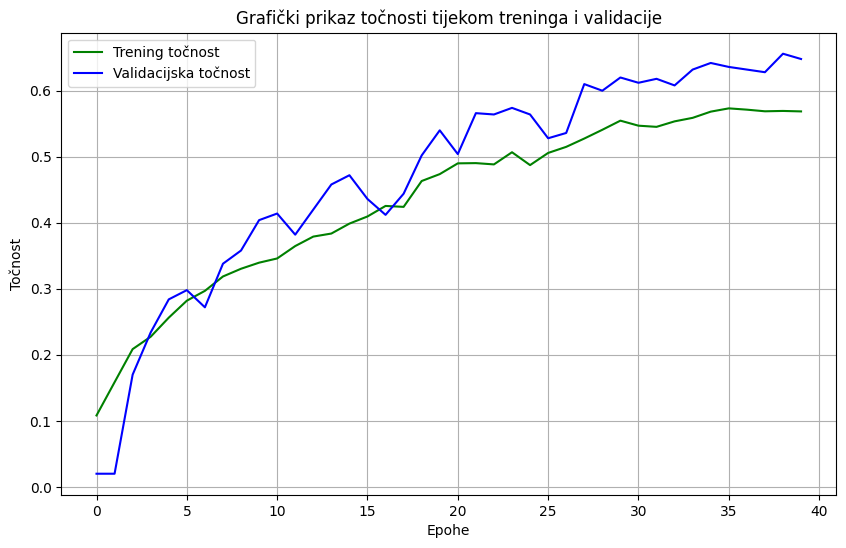

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje točnosti iz povijesti treniranja
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Dobivanje broja epoha
epochs = range(len(acc))

# Prikazivanje grafa točnosti
plt.figure(figsize=(10, 6))  # Veličina grafa
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Grafički prikaz točnosti tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Graf gubitka za četvrti model**

Graf prikazuje promjenu gubitka kod trening i validacijskog skupa kroz epohe.

Vidimo da obje krivulje postepeno padaju, što nam govori da model poboljšava svoju sposobnost predviđanja.

Kao i na grafu točnosti, vidimo povremene oscilacije na validacijskom gubitku što sugerira varijabilnost u modelu, ali generalni trend je pozitivan.

Ovaj graf dokazuje da model smanjuje gubitak za vrijeme treniranja i validacije, to je znak da se model dobro prilagođava podatcima. Što se tiče gubitka ovo je do sad najbolji model i dobar je pokazatelj napretka sa promjenama koje smo ubacivali kroz različite iteracije modela.

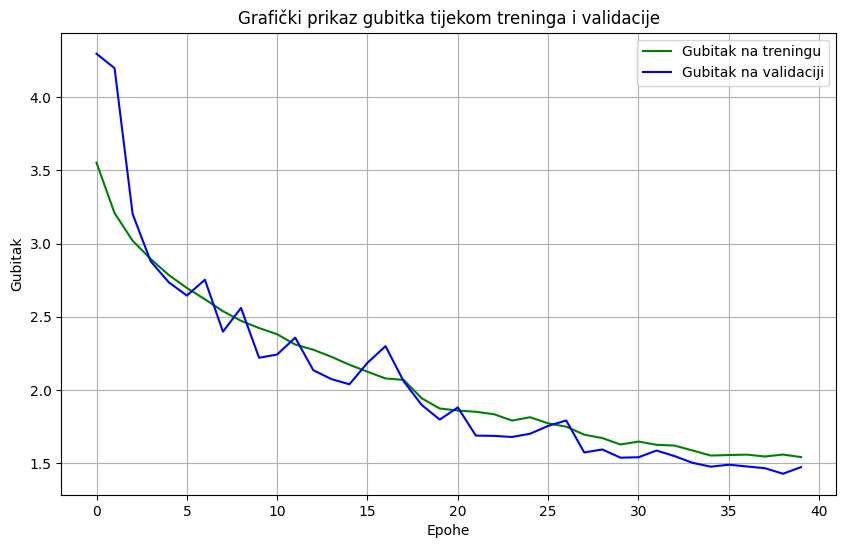

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje gubitka iz povijesti treniranja
loss = history.history['loss']
val_loss = history.history['val_loss']

# Dobivanje broja epoha
epochs = range(len(loss))

# Prikazivanje grafa gubitka
plt.figure(figsize=(10, 6)) # Veličina grafa
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Grafički prikaz gubitka tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Peti model (postojeća mreža-InceptionV3)**

Za peti model sam htio iskoristiti transfer learning gdje ću koristiti već unaprijed definiranu arhitekturu koja se temelji na InceptionV3 mreži koja je preuzeta s interneta.

S ovom arhitekturom očekujem bolje rezultate jer je jedna od najcjenjenijih arhitektura dubokog učenja.

Ovdje učitavamo bazni model (InceptionV3) koji je unaprijed treniran. Oblik unosa je stavljen na (150,150,3) kako bi odgovarao slikama.

Kasnije sam dodao vlastite parametre na već istrenirani model gdje sam dodao GlobalAveragePooling2D kako bi se smanjile prostorne dimenzije feature mapa.

Dodan je dense sloj s 512 neurona, a zatim dropout sloj sa stopom od 0.4 kako bi se smanjila pretreniranost i dodan je zadnji output sloj s 50 jedinica i funkcijom aktivacije softmax.

I kao u prethodnom modelu, dodao sam Learning Rate Scheduler koji će prilagođavati stopu učenja na temelju gubitka validacije.


Priprema podataka za peti model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=[0.8, 1.2])
validation_datagen = ImageDataGenerator(rescale = 1.0/255.,)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode ='categorical',
                                                    target_size = (150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        target_size = (150,150))

Found 5645 images belonging to 50 classes.
Found 500 images belonging to 50 classes.
Found 500 images belonging to 50 classes.


Stvaranje petog modela

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Učitavanje predtreniranog InceptionV3 modela, isključujući gornje slojeve
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = True

# Dodavanje custom slojeva na vrh predtreniranog baznog modela
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)

output = Dense(50, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output)


optimizer = Adam(learning_rate=1e-4)


lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 patience=3,
                                 factor=0.5,
                                 verbose=1)



model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 74, 74, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 74, 74, 32)     │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 74, 74, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 72, 72, 32)     │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 72, 72, 32)     │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 72, 72, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 72, 72, 64)     │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 72, 72, 64)     │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 72, 72, 64)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 35, 35, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 35, 35, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 35, 35, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 22,877,522 (87.27 MB)

 Trainable params: 22,843,090 (87.14 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:

history_fine_tune = model.fit(train_generator,
                              epochs=10,
                              steps_per_epoch=75,
                              validation_data=validation_generator,
                              callbacks=[lr_scheduler])

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 573s 7s/step - accuracy: 0.0919 - loss: 3.7546 - val_accuracy: 0.5280 - val_loss: 1.8259 - learning_rate: 1.0000e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 532s 7s/step - accuracy: 0.3935 - loss: 2.4872 - val_accuracy: 0.7680 - val_loss: 0.9204 - learning_rate: 1.0000e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.5717 - loss: 1.5905 - val_accuracy: 0.7700 - val_loss: 0.8774 - learning_rate: 1.0000e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 535s 7s/step - accuracy: 0.6421 - loss: 1.3046 - val_accuracy: 0.7980 - val_loss: 0.7703 - learning_rate: 1.0000e-04
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 511s 7s/step - accuracy: 0.6954 - loss: 1.0470 - val_accuracy: 0.8240 - val_loss: 0.7397 - learning_rate: 1.0000e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.6837 - loss: 1.0565 - val_accuracy: 0.8120 - val_loss: 0.7757 - learning_rate: 1.0000e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 554s 7s/step - accuracy: 0.7371 

##**Tumačenje rezultata petog modela**

Peti model prikazuje značajan napredak u točnosti i smanjivanju gubitka kroz epohe. U prvim epohama, točnost na trening i validacijskim podacima se postepeno povećava dok se gubitak postepeno smanjuje što znači da model učinkovito uči iz podataka. Na kraju treninga model je postigao veliku razinu točnosti i nisku razinu gubitka, što znači da model ima dobru generalizaciju podataka i stabilnost.

Model prikazuje dobar napredak u odnosu na prethodne modele s validacijskom točnošću od 88% nakon 10 epoha.

##**Graf točnosti za peti model**

Gledajući prethodne rezultate, bilo je očekivano da će obje krivulje prikazati stalan rast u točnosti, s mogućim oscilacijama prema kraju, gdje validacija može početi stagnirati ili opadati, što može sugerirati potencijalni overfitting.

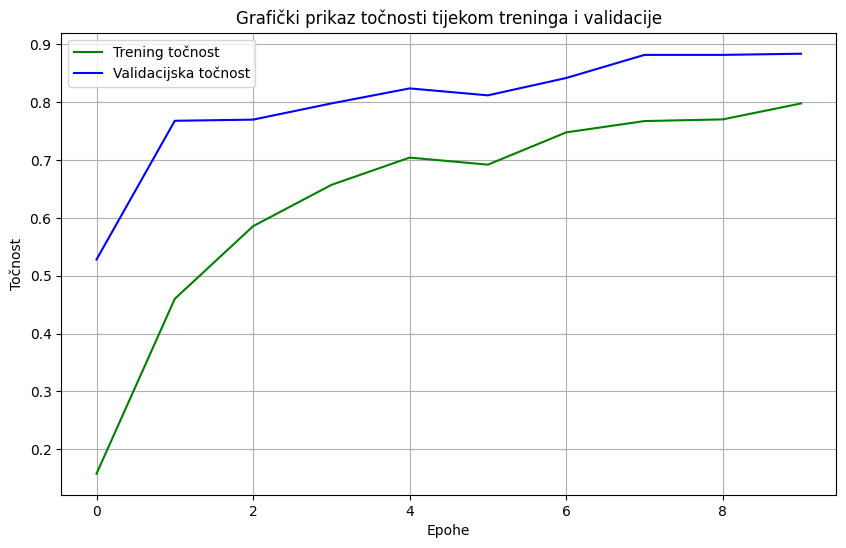

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje točnosti iz povijesti treniranja
acc = history_fine_tune.history['accuracy']
val_acc = history_fine_tune.history['val_accuracy']

# Dobivanje broja epoha
epochs = range(len(acc))

# Prikazivanje grafa točnosti
plt.figure(figsize=(10, 6))  # Veličina grafa
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Grafički prikaz točnosti tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Graf gubitka za peti model**

Gledajući prethodne rezultate, bilo je očekivano da će obje krivulje prikazati stalan pad gubitka, s mogućim oscilacijama prema kraju, gdje validacijski gubitak može početi stagnirati ili se blago povećavati, što može sugerirati početak pretreniranosti.

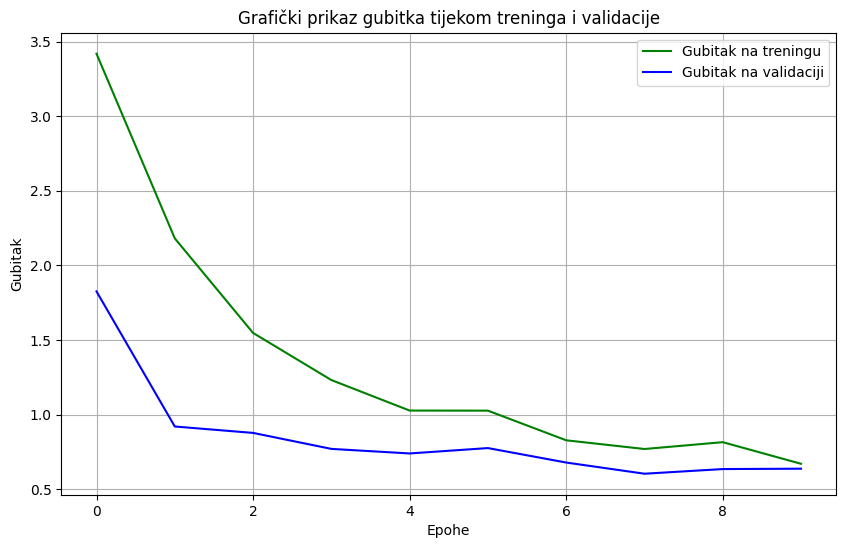

In [ ]:
import matplotlib.pyplot as plt

# Dobivanje gubitka iz povijesti treniranja
loss = history_fine_tune.history['loss']
val_loss = history_fine_tune.history['val_loss']

# Dobivanje broja epoha
epochs = range(len(loss))

# Prikazivanje grafa gubitka
plt.figure(figsize=(10, 6)) # Veličina grafa
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Grafički prikaz gubitka tijekom treninga i validacije')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)  #Dodavanje mreže na graf
plt.show()

##**Zaključak**

Kao što možemo vidjeti iz dosadašnjih rezultata koje smo dobili, peti model(InceptionV3) je do sad najbolji, s četvrtim modelom iza njega. Oba modela prikazuju napredak u točnosti i smanjenju gubitka kroz epohe, s tim da peti model i dalje proizvodi bolje konačne rezultate.

- **Peti model**: Gubitak u početku je visok, ali se brzo počinje smanjivati, te se u isto vrijeme točnost znatno povećava. Model završava s jako visokom točnošću od 80% na treningu i 88% na validaciji, te niskim gubitkom od 0.65 na treningu i 0.63 na validaciji.

- **Četvrti model**: pokazuje solidne rezultate s točnošću oko 57% na treningu i oko 65% na validaciji te s gubitkom od 1.55 na treningu i 1.47 na validaciji, nije bolji od petog modela ali je bolji od prva tri.

Oba modela su bolji od ostalih:

- **Prvi model**: Daje jako dobre rezultate na trening skupu, ali je jako loš na validacijskom skupu zbog pretreniranosti što ga ne čini jako pouzdanim.

- **Drugi model**: Daje lošije rezultate od prvog modela na trening podatcima ali ima manju razinu pretreniranosti i bolju validaciju od prvog modela.

- **Treći model**: Daje lošije rezultate od drugog modela na trening i validacijskim podatcima, ali za razliku od prethodnih modela, nema problem s overfitanjem.

Peti model se ističe s najboljim napretkom i visokom završnom točnošću, dok je četvrti model druga najbolja opcija od svih modela koje imamo.

S ovim rezultatima možemo zaključiti da su četvrti i peti model najbolji za ovaj zadatak, dok ostali modeli traže dodatnu optimizaciju i prilagodbu.